dados realizados _ Lucas Porto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'

dados = pd.read_csv(fonte)

In [2]:
dados.head(10)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
5,190001004841,2019,1503606,Itaituba,15,PA,18,F,1,3,1,1503606.0,Itaituba,15.0,PA,2,0,2,1.0,0,15152120.0,1503606.0,Itaituba,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,ECEBDBAACAACBCEEECCACDCEEDBECADBDADEADCAEACBE,99999ABCEDBCBABDDBDCDDEECDEEEBECBCCDEBDACD

In [3]:
dados.shape

(127380, 136)

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(24), int64(71), object(41)
memory usage: 132.2+ MB


In [5]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

#### Desafio01: Proporção de inscritos por idade

In [6]:
dados_por_idade = dados["NU_IDADE"].value_counts().sort_index()
dados_por_idade

total_dos_inscritos = len(dados["NU_IDADE"]) #total de inscritos



In [7]:
distribuicao_por_idade = dados_por_idade/total_dos_inscritos
distribuicao_por_idade_percentual = distribuicao_por_idade*100 #distribuição percentual

distribuicao_por_idade_percentual = pd.DataFrame(distribuicao_por_idade_percentual).rename(columns = {'NU_IDADE': 'Proporção (%)'}, inplace = False)

distribuicao_por_idade_percentual.columns.name = 'Idade'

distribuicao_por_idade_percentual.head(5)  #df cin as idades e percentuais



Idade,Proporção (%)
13,0.003140
14,0.110692
15,1.577171
16,6.146962
17,16.687078


In [8]:
distribuicao_por_idade_percentual.index

Int64Index([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
            30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
            47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
            64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 82],
           dtype='int64')

Podemos também adicionar a quantidade e alterar o dataframe criado.

In [9]:
df_distribuicao_idade = pd.DataFrame()
df_distribuicao_idade['Idade'] = distribuicao_por_idade_percentual.index
df_distribuicao_idade['Total'] = dados_por_idade.values
df_distribuicao_idade['Proporção (%)'] = distribuicao_por_idade_percentual.values
df_distribuicao_idade.head(10)

,Idade,Total,Proporção (%)
0,13,4,0.003140
1,14,141,0.110692
2,15,2009,1.577171
3,16,7830,6.146962
4,17,21256,16.687078
5,18,21452,16.840948
6,19,14418,11.318888
7,20,10413,8.174753
8,21,7267,5.704977
9,22,5924,4.650652


#### Desafio02: Descobrir quais estados são os escritos por 13 anos.

In [10]:
estados_com_13_anos  = dados.query("NU_IDADE==13")['SG_UF_RESIDENCIA'].value_counts().sort_index()
estados_com_13_anos = pd.DataFrame(estados_com_13_anos).rename(columns = {'SG_UF_RESIDENCIA': 'Quantidade de Inscritos com 13 anos'}, inplace = False)

estados_com_13_anos.columns.name = 'Estado'
estados_com_13_anos


Estado,Quantidade de Inscritos com 13 anos
AP,1
BA,1
MT,1
SP,1


#### Desafio03: Inserir título no histograma

Text(0.5, 1.0, 'Histograma das Idades dos Inscritos')

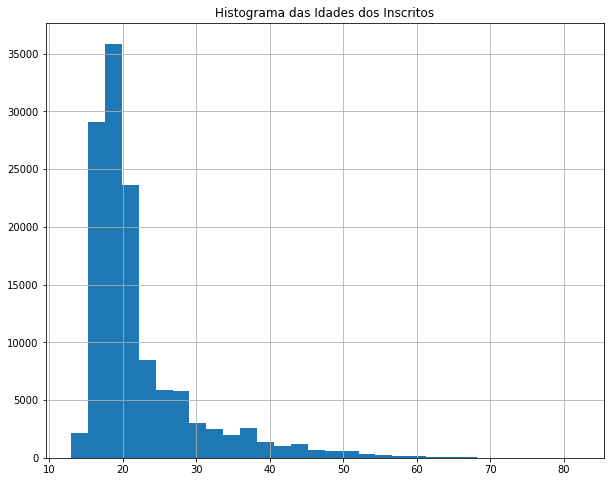

In [11]:
dados["NU_IDADE"].hist(bins = 30, figsize = (10,8)).set_title("Histograma das Idades dos Inscritos")

#### Desafio04: Plotar os Histogramas das idades dos treineiros e não treineiros

In [12]:
n_bins = 50

treineiros = dados.query("IN_TREINEIRO==1")["NU_IDADE"]
nao_treineiros = dados.query("IN_TREINEIRO==0")["NU_IDADE"]


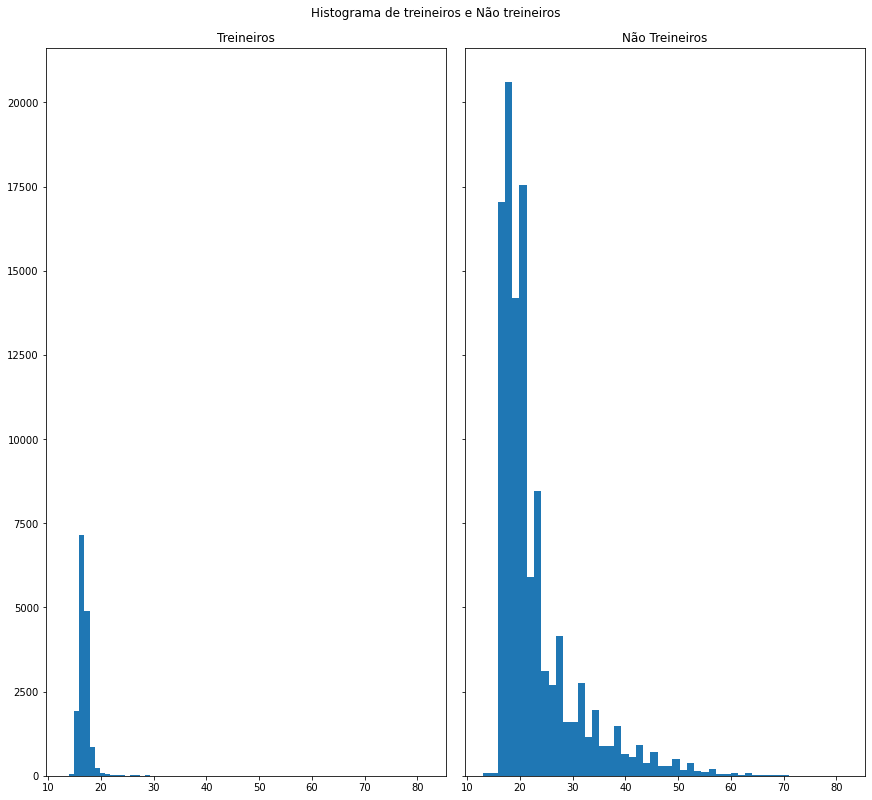

In [13]:
fig, axs = plt.subplots(nrows = 1,  ncols=2,  constrained_layout=True, figsize = (12,11), sharey = True, sharex = True)
fig.suptitle('Histograma de treineiros e Não treineiros')

axs[0].hist(treineiros, n_bins)
axs[0].set_title("Treineiros")

axs[1].hist(nao_treineiros, n_bins)
axs[1].set_title("Não Treineiros")

plt.show()

Conforme solicitado no desafio06, iremos verificar uma outra forma de apresentar os dados.

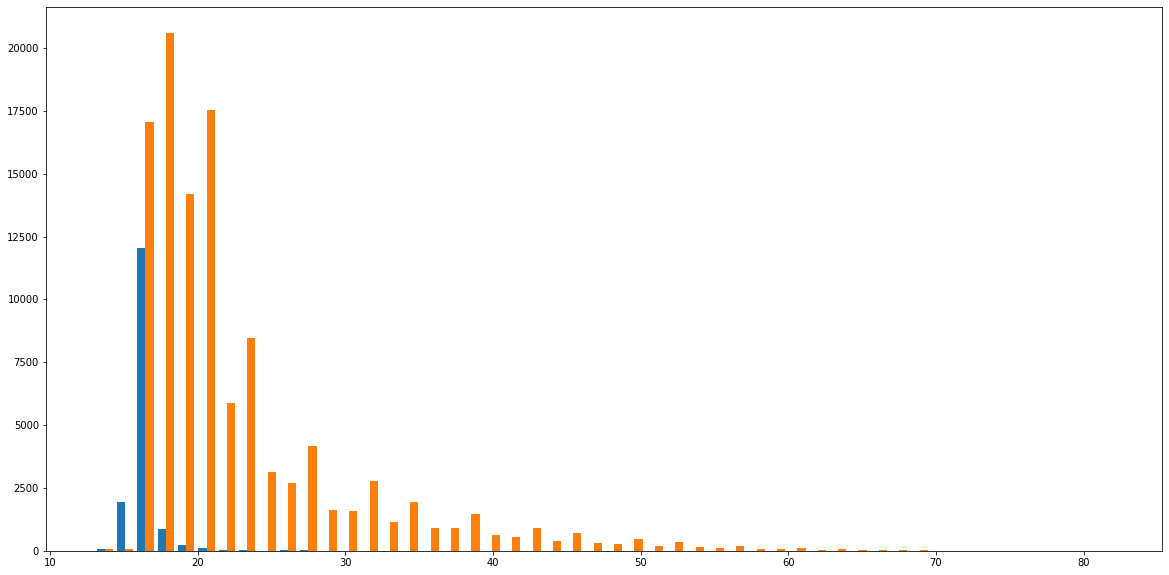

In [14]:
plt.figure(figsize = (20,10))
plt.hist([treineiros,nao_treineiros], bins = n_bins,
        label = ['Idade Treineiros', 'Idade Não Treineiros'])
plt.show()

Uma questão que fica no ar é, qual nossa distribuição em porcentagem dos treineiros e não treineiros.

In [15]:
print(f'Idade maxima dos não treineiros = {nao_treineiros.max()}')
print(f'Idade maxima dos treineiros = {treineiros.max()}')

Idade maxima dos não treineiros = 82
Idade maxima dos treineiros = 62


#### Desafio05: Comparar as distribuições das provas em inglês espanhol


Analisando o dicionário de dados temos:


TP_LINGUA
 0	Inglês
 1	Espanhol

In [17]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

notas_ingles = dados.query("TP_LINGUA==0")[provas]
notas_ingles_lc = notas_ingles['NU_NOTA_LC']
notas_ingles_lc 

notas_espanhol = dados.query("TP_LINGUA==1")[provas]
notas_espanhol_lc = notas_espanhol['NU_NOTA_LC']
notas_espanhol_lc 

0         488.6
1         375.3
2         441.0
3         551.5
5         607.5
          ...  
127372    533.9
127374      NaN
127375    525.7
127377    497.9
127378    517.3
Name: NU_NOTA_LC, Length: 66809, dtype: float64

In [18]:
data_notas_lc_lingua = pd.DataFrame(data={'Inglês':notas_ingles_lc, 'Espanhol':notas_espanhol_lc })
data_notas_lc_lingua

,Inglês,Espanhol
0,NaN,488.6
1,NaN,375.3
2,NaN,441.0
3,NaN,551.5
4,511.2,NaN
...,...,...
127375,NaN,525.7
127376,450.3,NaN
127377,NaN,497.9
127378,NaN,517.3


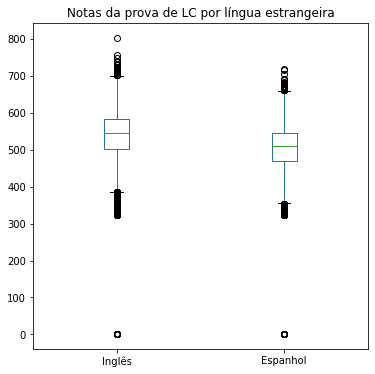

In [19]:
data_notas_lc_lingua.plot.box(figsize=(6,6),title="Notas da prova de LC por língua estrangeira");

#### Desafio06: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.

Algumas novas visões são apresentadas juntos dos desafios anteriores. Agora olhando mais profundamente ao nosso dicionário de dados, temos:


```



#TP_SEXO
#M Masclulino
#F Feminino

#TP_COR_RACA
#0	Não declarado
#1	Branca
#2	Preta
#3	Parda
#4	Amarela
#5	Indígena 


#Q006
#Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)
#A	Nenhuma renda.
#B	Até R$ 998,00.
#C	De R$ 998,01 até R$ 1.497,00.
#D	De R$ 1.497,01 até R$ 1.996,00.
#E	De R$ 1.996,01 até R$ 2.495,00.
#F	De R$ 2.495,01 até R$ 2.994,00.
#G	De R$ 2.994,01 até R$ 3.992,00.
#H	De R$ 3.992,01 até R$ 4.990,00.
#I	De R$ 4.990,01 até R$ 5.988,00.
#J	De R$ 5.988,01 até R$ 6.986,00.
#K	De R$ 6.986,01 até R$ 7.984,00.
#L	De R$ 7.984,01 até R$ 8.982,00.
#M	De R$ 8.982,01 até R$ 9.980,00.
#N	De R$ 9.980,01 até R$ 11.976,00.
#O	De R$ 11.976,01 até R$ 14.970,00.
#P	De R$ 14.970,01 até R$ 19.960,00.
#Q	Mais de R$ 19.960,00.

```



In [20]:
dados_sexo = dados['TP_SEXO'].value_counts()
dados_totais = len(dados['TP_SEXO'])
dados_sexo_porcentagem = (dados_sexo/dados_totais)*100

df_dados_sexo = pd.DataFrame()
df_dados_sexo['Sexo'] = dados_sexo.index
df_dados_sexo['Total'] = dados_sexo.values
df_dados_sexo['Proporção (%)'] = dados_sexo_porcentagem.values
df_dados_sexo

,Sexo,Total,Proporção (%)
0,F,75883,59.572146
1,M,51497,40.427854


In [21]:
dados_raca = dados['TP_COR_RACA'].value_counts()
dados_raca

3    59132
1    45616
2    16300
4     2975
0     2565
5      792
Name: TP_COR_RACA, dtype: int64

In [22]:
dados_raca_sexo = dados[['TP_SEXO','TP_COR_RACA']]

In [23]:
dados_raca_sexo.value_counts()

TP_SEXO  TP_COR_RACA
F        3              35961
         1              26572
M        3              23171
         1              19044
F        2               9419
M        2               6881
F        4               2044
         0               1426
M        0               1139
         4                931
F        5                461
M        5                331
dtype: int64

In [24]:
def definir_sexo(num):
    if num == 0:
      return 'Não declarado'
    elif num == 1:
      return 'Branca'
    elif num == 2:
      return 'Preta'
    elif num == 3:
      return 'Parda'
    elif num == 4:
      return 'Amarela'
    elif num == 5:
      return 'Indígena'

In [25]:
dados_raca_sexo['DSC_RACA'] = dados_raca_sexo['TP_COR_RACA'].map(definir_sexo)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
dados_raca_sexo.drop('TP_COR_RACA', axis=1, inplace= True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
dados_raca_sexo.value_counts()

TP_SEXO  DSC_RACA     
F        Parda            35961
         Branca           26572
M        Parda            23171
         Branca           19044
F        Preta             9419
M        Preta             6881
F        Amarela           2044
         Não declarado     1426
M        Não declarado     1139
         Amarela            931
F        Indígena           461
M        Indígena           331
dtype: int64

In [28]:
nao_declarados = dados_raca_sexo.query('DSC_RACA == "Não declarado"')['TP_SEXO'].value_counts()
brancos = dados_raca_sexo.query('DSC_RACA == "Branca"')['TP_SEXO'].value_counts()
pretos = dados_raca_sexo.query('DSC_RACA == "Preta"')['TP_SEXO'].value_counts()
pardos = dados_raca_sexo.query('DSC_RACA == "Parda"')['TP_SEXO'].value_counts()
amarelos = dados_raca_sexo.query('DSC_RACA == "Amarela"')['TP_SEXO'].value_counts()
indigenas = dados_raca_sexo.query('DSC_RACA == "Indígena"')['TP_SEXO'].value_counts()

In [29]:
index = dados_raca_sexo['TP_SEXO'].unique()

df_dados_raca_sexo = pd.DataFrame({'Não declarado': nao_declarados,
                               'Brancas' :brancos,
                               'Pretas' : pretos,
                               'Pardas': pardos,
                               'Amarelas': amarelos,
                               'Indígenas': indigenas},
                               index = index
                               )
df_dados_raca_sexo.columns.name = 'Sexo' 
df_dados_raca_sexo

Sexo,Não declarado,Brancas,Pretas,Pardas,Amarelas,Indígenas
M,1139,19044,6881,23171,931,331
F,1426,26572,9419,35961,2044,461


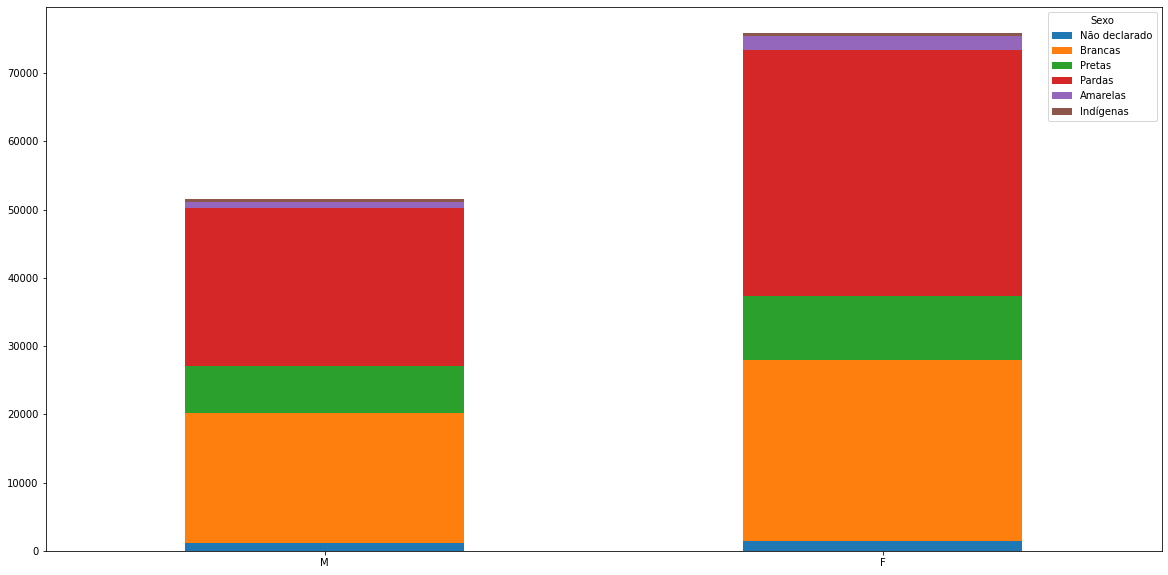

In [30]:
fig = df_dados_raca_sexo.plot.bar(rot=0, figsize = (20,10), stacked=True)